In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.decomposition import FastICA
from tqdm.notebook import tqdm

In [2]:
# Resize
const = 5
from PIL import Image

titan_path = '/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/sun-titan.jpg'
force_path = '/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/force-of-will.jpg'
guide_path = '/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/goblin-guide.jpg'
witness_path = '/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/eternal-witness.jpg'
bob_path = '/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/dark-confidant.jpg'

pics = [titan_path,force_path,guide_path,witness_path,bob_path]
pic_name = ['titan','force','guide','witness','bob']
dim = (56*const,45*const)
for i in range(len(pic_name)):
    img = Image.open(pics[i])
    new_img = img.resize(dim)
    name = '/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/' + pic_name[i] + '.jpeg'
    new_img.save(name, "JPEG", optimize=True)

In [3]:
# Collect 
titan = imread('/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/titan.jpeg') # array (width, height, rgbn channels) 
force = imread('/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/force.jpeg')
guide = imread('/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/guide.jpeg')
witness = imread('/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/witness.jpeg')
bob = imread('/Users/Svesketerning/Google-Drev/Project in Statistics/pictures/bob.jpeg')
titan = titan[:,:,0].flatten()
force = force[:,:,0].flatten()
guide = guide[:,:,0].flatten()
witness = witness[:,:,0].flatten()
bob = bob[:,:,0].flatten()
X = np.vstack((titan,force,guide,witness,bob))

In [4]:
# Mix usign random matrix A
A = np.random.rand(5,5)
Xs = [0,0,0,0,0] 
for i in range(X.shape[1]):
    temp = np.dot(A,X[:,i])
    Xs = np.vstack((Xs,temp))
Xs = Xs[1:,:] 

In [6]:
# FastICA
transformer = FastICA()
S = (transformer.fit_transform(Xs)).transpose()

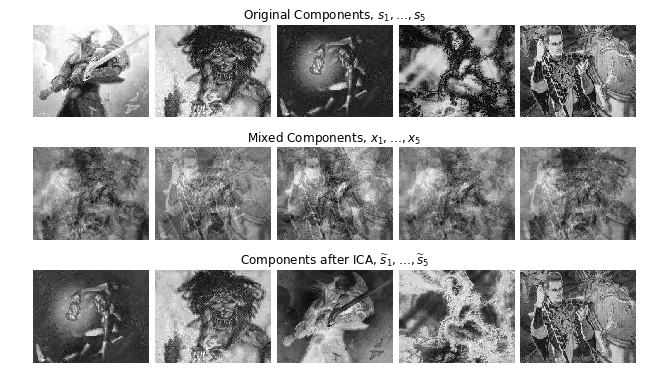

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5)
for i in range(5):
    axes[0,i].imshow(X[i,:].reshape(45*const,56*const),
              cmap="gray")
    axes[0,i].axis('off')
    axes[1,i].imshow(Xs[:,i].reshape(45*const,56*const),
              cmap="gray")
    axes[1,i].axis('off')
    axes[2,i].imshow(S[i,:].reshape(45*const,56*const),
              cmap="gray")
    axes[2,i].axis('off')
axes[0,2].set_title(r"Original Components, $s_1,\ldots,s_5$")
axes[1,2].set_title("Mixed Components, $x_1,\ldots,x_5$")
axes[2,2].set_title("Components after ICA, $\widetilde{s}_1,\ldots,\widetilde{s}_5$")
plt.tight_layout(pad=-10, w_pad=-8.5, h_pad=-12)
fig.savefig('comparison.pdf', format='pdf', bbox_inches = 'tight', dpi=600)